# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

pd.set_option('display.max_columns', None)  # Set to display all columns

In [2]:
# Load Data
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('Total Emissions Per Country (2000-2020).csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_fao = pd.read_csv('fao_global_food_waste_2000_2021.csv', encoding='latin1')

# 1) Dataset agroFood

In [3]:
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [4]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]

# Rename algumas colunas
df_agroFood = df_agroFood.rename(columns={'Area': 'Country', 'total_emission': 'Emissions_food'})
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


<Axes: >

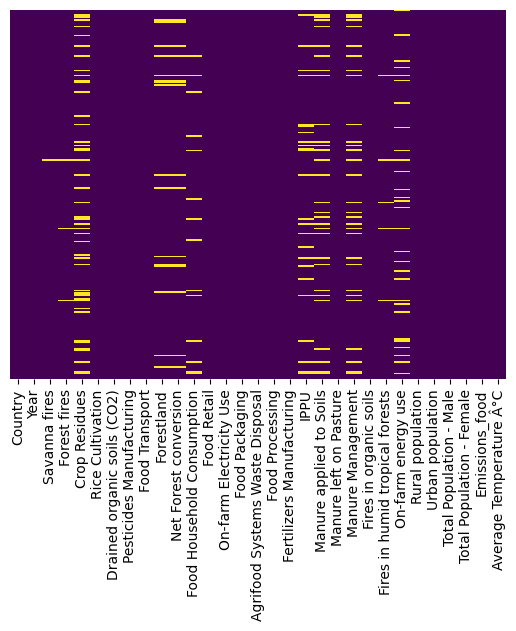

In [6]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
nan_counts = df_agroFood.isna().sum()
nan_counts

Country                              0
Year                                 0
Savanna fires                       11
Forest fires                        33
Crop Residues                      492
Rice Cultivation                     0
Drained organic soils (CO2)          0
Pesticides Manufacturing             0
Food Transport                       0
Forestland                         176
Net Forest conversion              176
Food Household Consumption         154
Food Retail                          0
On-farm Electricity Use              0
Food Packaging                       0
Agrifood Systems Waste Disposal      0
Food Processing                      0
Fertilizers Manufacturing            0
IPPU                               264
Manure applied to Soils            322
Manure left on Pasture               0
Manure Management                  322
Fires in organic soils               0
Fires in humid tropical forests     55
On-farm energy use                 319
Rural population         

In [8]:
columns_with_nan = (nan_counts > 0).sum()
print("Number of columns with NaN values:", columns_with_nan)

Number of columns with NaN values: 11


In [9]:
# Remover o país Holy See (tem muitos NaNs)
df_agroFood.drop(df_agroFood[df_agroFood['Country'] == 'Holy See'].index, inplace=True)
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [10]:
df_agroFood['Forest fires'].fillna(0.0, inplace=True)

In [11]:
nan_rows = df_agroFood[df_agroFood['Forestland'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
206,Anguilla,2010,0.0000,0.0000,NaN,2319.753955,0.0,11.481085,4.5086,NaN,NaN,11.5626,8.5406,1.6598,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6250.660317,NaN,0.0,0.0000,3.4684,0.0,13769.0,6470.0,6702.0,12025.536164,1.011667
207,Anguilla,2011,0.0000,0.0000,NaN,2319.753955,0.0,11.481085,4.3126,NaN,NaN,11.5043,8.2311,1.7090,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6250.660317,NaN,0.0,0.0000,3.3998,0.0,13951.0,6552.0,6790.0,12024.952964,0.525917
208,Anguilla,2012,0.0000,0.0000,NaN,2319.753955,0.0,11.481085,4.2846,NaN,NaN,11.4935,7.4297,1.5571,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6250.660317,NaN,0.0,0.0000,3.3760,0.0,14129.0,6606.0,6849.0,12023.937064,0.670167
209,Anguilla,2013,0.0000,0.0000,NaN,2319.753955,0.0,11.481085,3.9548,NaN,NaN,10.9374,7.1755,1.4229,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6250.660317,NaN,0.0,0.0000,3.3934,0.0,14299.0,6731.0,6970.0,12022.680164,0.784250
210,Anguilla,2014,0.0000,0.0000,NaN,2319.753955,0.0,11.481085,4.2265,NaN,NaN,11.8772,7.4604,1.3887,74.018133,65.072347,483.12610,2791.684228,0.0000,NaN,6250.660317,NaN,0.0,0.0000,3.5809,0.0,14459.0,6944.0,7176.0,12024.329864,0.790583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,Vanuatu,2016,0.0000,0.0000,0.0655,246.407276,0.0,4.000000,11.3598,NaN,NaN,3.4101,30.4229,1.3823,80.607732,12.116000,252.21419,2240.392965,4.6875,7.0815,67.277000,60.4940,0.0,0.0000,9.3664,202634.0,67768.0,142613.0,140606.0,3031.285163,1.156000
6742,Vanuatu,2017,0.2003,8.6132,0.0666,246.407276,0.0,4.000000,9.9916,NaN,NaN,3.5608,34.3980,1.4742,80.607732,12.426700,252.21419,3052.546276,4.8193,7.0411,70.609400,60.8040,0.0,8.6132,8.1971,206733.0,69511.0,146105.0,144135.0,3866.590974,1.081083
6743,Vanuatu,2018,0.0000,0.0000,0.0670,246.407276,0.0,3.000000,14.0470,NaN,NaN,3.5329,39.5637,1.2697,80.607732,12.734300,252.21419,2240.392965,4.8911,7.3476,68.890700,61.9989,0.0,0.0000,11.0087,210816.0,71301.0,149615.0,147683.0,3047.973763,0.626583
6744,Vanuatu,2019,0.0000,0.0000,0.0675,246.407276,0.0,3.000000,12.3254,NaN,NaN,3.5657,44.4501,1.3915,80.607732,12.940900,252.21419,2240.392965,4.8876,6.9856,61.344800,59.6191,0.0,0.0000,9.7323,214878.0,73139.0,153149.0,151256.0,3039.932663,0.941167


In [12]:
nan_rows_forestland = df_agroFood[df_agroFood['Forestland'].isnull()]
unique_countries_with_null_forestland = nan_rows_forestland['Country'].unique()
unique_countries_with_null_forestland

array(['Anguilla', 'Antigua and Barbuda', 'Bermuda',
       'British Virgin Islands', 'Channel Islands',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'Isle of Man', 'Kiribati',
       'North Macedonia', 'Palau', 'Palestine', 'Saint Kitts and Nevis',
       'United Arab Emirates', 'Vanuatu'], dtype=object)

In [13]:
df_agroFood['Forestland'].fillna(0.0, inplace=True)

In [14]:
df_agroFood['Net Forest conversion'].fillna(0.0, inplace=True)

In [15]:
nan_rows = df_agroFood[df_agroFood['Crop Residues'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
113,American Samoa,2010,0.0,0.0,NaN,926.342278,0.0,11.481085,18.396300,-47.4212,8.0212,0.8048,7.240500,17.004663,77.393651,2.020800,80.840300,2005.792129,NaN,NaN,2148.251693,NaN,0.0,0.0,35.5180,6902.0,48735.0,27660.0,27189.0,5291.686199,1.259182
114,American Samoa,2011,0.0,0.0,NaN,1410.445506,0.0,11.481085,10.110100,-44.7322,8.8374,0.7090,4.171800,17.004663,77.393651,2.008100,46.986200,2005.792129,NaN,NaN,2148.251693,NaN,0.0,0.0,20.3900,6914.0,48406.0,27358.0,26951.0,5718.849126,0.847417
115,American Samoa,2012,0.0,0.0,NaN,1410.445506,0.0,11.481085,9.844500,-44.7322,8.8374,0.7050,3.979900,17.004663,77.393651,2.003900,44.428700,2005.792129,NaN,NaN,2148.251693,NaN,0.0,0.0,19.3547,6948.0,48282.0,27014.0,26678.0,5714.790626,0.942500
116,American Samoa,2013,0.0,0.0,NaN,1410.445506,0.0,11.481085,9.831900,-44.7322,8.8374,0.7151,3.979900,17.004663,77.393651,2.004700,44.748500,2005.792129,NaN,NaN,2148.251693,NaN,0.0,0.0,19.6998,6997.0,48310.0,26627.0,26369.0,5715.453826,1.291167
117,American Samoa,2014,0.0,0.0,NaN,1410.445506,0.0,11.481085,9.948400,-44.7322,8.8374,0.7270,4.028000,17.004663,77.393651,2.006400,45.387800,2005.792129,NaN,NaN,2148.251693,NaN,0.0,0.0,19.6998,7047.0,48390.0,26199.0,26017.0,5716.271326,1.146500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,Western Sahara,2016,0.0,0.0,NaN,926.342278,0.0,252.742028,2298.021251,-104.5657,0.0000,NaN,1266.337019,643.580231,1186.432655,102.509512,2369.112862,2012.447178,NaN,NaN,2148.251693,NaN,0.0,0.0,NaN,72391.0,466364.0,278840.0,226615.0,13101.211008,1.689000
6866,Western Sahara,2017,0.0,0.0,NaN,926.342278,0.0,252.742028,2298.021251,-104.5657,0.0000,NaN,1266.337019,643.580231,1186.432655,125.806542,2369.112862,2012.447178,NaN,NaN,2148.251693,NaN,0.0,0.0,NaN,73931.0,478697.0,286418.0,232440.0,13124.508039,2.089667
6867,Western Sahara,2018,0.0,0.0,NaN,926.342278,0.0,252.742028,2298.021251,-104.5657,0.0000,NaN,1259.026036,643.580231,1186.432655,128.229188,2369.112862,2012.447178,NaN,NaN,2148.251693,NaN,0.0,0.0,NaN,75548.0,491873.0,293827.0,238176.0,13119.619702,1.033500
6868,Western Sahara,2019,0.0,0.0,NaN,926.342278,0.0,252.742028,2298.021251,-104.5657,0.0000,NaN,1266.337019,643.580231,1186.432655,138.576362,2369.112862,2012.447178,NaN,NaN,2148.251693,NaN,0.0,0.0,NaN,77150.0,505328.0,301060.0,243815.0,13137.277858,1.432333


In [16]:
nan_rows_crop = df_agroFood[df_agroFood['Crop Residues'].isnull()]
unique_countries_with_null_crop = nan_rows_crop['Country'].unique()
unique_countries_with_null_crop

array(['American Samoa', 'Andorra', 'Anguilla', 'Aruba', 'Bahrain',
       'Bermuda', 'British Virgin Islands', 'Cayman Islands',
       'Channel Islands', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Cook Islands', 'Equatorial Guinea', 'Falkland Islands (Malvinas)',
       'Gibraltar', 'Greenland', 'Guadeloupe', 'Guam', 'Isle of Man',
       'Kiribati', 'Liechtenstein', 'Marshall Islands', 'Martinique',
       'Mayotte', 'Monaco', 'Montserrat', 'Nauru',
       'Netherlands Antilles (former)', 'Niue',
       'Northern Mariana Islands', 'Palau',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Samoa', 'San Marino', 'Seychelles',
       'Singapore', 'Tokelau', 'Tonga', 'Turks and Caicos Islands',
       'Tuvalu', 'United States Virgin Islands',
       'Wallis and Futuna Islands', 'Western Sahara'], dtype=object)

In [17]:
df_agroFood = df_agroFood.dropna(subset=['Crop Residues'])

In [18]:
nan_rows = df_agroFood[df_agroFood['Food Household Consumption'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
2392,Gambia,2010,94.3489,0.0000,28.6539,607.874400,0.0000,10.000000,7.1341,0.0000,527.6271,NaN,47.5232,2.224100,212.033652,192.2806,267.887283,599.422429,9.9049,7.0176,237.4015,26.6956,0.0,0.0000,21.9406,750273.0,941876.0,958562.0,978713.0,2899.969864,1.412417
2393,Gambia,2011,105.1059,0.0000,15.3190,296.535500,0.0000,13.000000,7.8370,0.0000,527.5351,NaN,47.8854,2.031100,212.033652,195.1471,267.887283,599.422429,10.1051,5.7257,218.1101,22.8312,0.0,0.0000,21.8340,761696.0,984667.0,989446.0,1008766.0,2568.345564,0.908500
2394,Gambia,2012,84.9701,0.0000,19.6796,448.705200,0.0000,13.000000,7.4504,0.0000,527.5351,NaN,49.0282,1.286000,212.033652,198.0648,267.887283,599.422429,10.1052,4.8637,203.1002,19.8085,0.0,0.0000,23.6410,773029.0,1029096.0,1021199.0,1039815.0,2690.581364,0.947250
2395,Gambia,2013,81.6637,0.0000,19.5975,468.377300,0.0000,13.000000,7.8019,0.0000,527.5351,NaN,50.5999,0.622700,212.033652,201.1233,267.887283,599.422429,10.4054,4.8994,220.6173,20.5896,0.0,0.0000,20.4157,784258.0,1075066.0,1053493.0,1071377.0,2726.592164,1.028333
2396,Gambia,2014,62.9252,0.0000,17.2325,467.714000,0.0000,14.000000,8.6454,0.0000,527.5351,NaN,55.6764,1.337100,212.033652,203.9570,267.887283,599.422429,10.5056,5.4727,241.7283,22.7439,0.0,0.0000,40.7748,795364.0,1122488.0,1085941.0,1103078.0,2759.591364,1.190500
2397,Gambia,2015,43.0081,0.0000,20.4946,601.135900,0.0000,14.000000,8.6982,0.0000,527.5351,NaN,62.1886,1.253900,212.033652,207.1890,267.887283,599.422429,10.3058,5.7706,248.0812,23.6674,0.0,0.0000,41.9210,806309.0,1171281.0,1118341.0,1134792.0,2894.592764,1.207167
2398,Gambia,2016,84.5489,0.0000,17.3352,464.990400,0.0000,14.000000,8.8210,0.0000,527.7191,NaN,72.0184,1.361600,212.033652,210.4290,267.887283,599.422429,10.3059,5.6473,231.4744,22.6972,0.0,0.0000,43.6888,817075.0,1221426.0,1150704.0,1166502.0,2794.380564,1.710417
2399,Gambia,2017,80.5076,0.0000,14.9013,464.665800,0.0000,13.000000,8.9512,0.0000,527.7191,NaN,81.4645,1.794700,212.033652,213.9771,267.887283,599.422429,10.3061,5.9085,239.4038,23.5622,0.0,0.0000,44.9265,827654.0,1272914.0,1182968.0,1198214.0,2810.431764,1.635083
2400,Gambia,2018,70.9264,0.4167,11.5013,287.136900,0.0000,14.000000,8.4872,0.0000,527.7191,NaN,93.2112,3.075900,212.033652,217.2581,267.887283,599.422429,10.4063,6.0373,243.5043,23.9852,0.0,0.4167,39.0320,838035.0,1325730.0,1215115.0,1229801.0,2636.457964,1.099333
2401,Gambia,2019,63.8544,0.0000,13.7457,458.640000,0.0000,13.000000,8.7861,0.0000,527.7191,NaN,103.6379,2.664400,212.033652,220.6929,267.887283,599.422429,10.8064,6.1179,245.0219,24.1877,0.0,0.0000,39.5869,848212.0,1379863.0,1247342.0,1261541.0,2817.804664,1.331500


In [19]:
nan_rows_consumption = df_agroFood[df_agroFood['Food Household Consumption'].isnull()]
unique_countries_with_null_consumption = nan_rows_consumption['Country'].unique()
unique_countries_with_null_consumption

array(['Gambia', 'Liberia', 'Namibia'], dtype=object)

In [20]:
df_agroFood = df_agroFood.dropna(subset=['Food Household Consumption'])

In [21]:
nan_rows = df_agroFood[df_agroFood['IPPU'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
2206,Faroe Islands,2010,0.0000,0.0000,0.0181,246.407276,235.9155,0.000000,11.501200,-0.1057,0.0000,0.0784,7.582900,17.004663,134.463835,11.905200,386.192572,2005.792129,NaN,1.1953,5.6387,1.6254,0.0,0.0000,237.0931,28680.0,19870.0,25139.0,23271.0,3302.308576,0.084000
2207,Faroe Islands,2011,0.0000,0.0000,0.0187,246.407276,235.9155,0.000000,11.774200,-0.1465,0.0000,0.0773,6.571200,17.004663,134.463835,12.009400,386.192572,2005.792129,NaN,1.1994,5.7097,1.6201,0.0,0.0000,202.9233,28636.0,19972.0,25106.0,23279.0,3267.532776,1.114500
2208,Faroe Islands,2012,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,11.538500,-0.1465,0.0000,0.0775,6.831600,17.004663,134.463835,12.079000,386.192572,2005.792129,NaN,1.1986,5.7776,1.6019,0.0,0.0000,226.7557,28603.0,20063.0,25084.0,23307.0,3291.508976,0.413833
2209,Faroe Islands,2013,0.0000,0.0000,0.0202,246.407276,235.9155,0.000000,12.642700,-0.1465,0.0000,0.0739,7.808600,17.004663,134.463835,12.146900,386.192572,2005.792129,NaN,1.2071,5.7853,1.6198,0.0,0.0000,264.8852,28584.0,20163.0,25070.0,23349.0,3331.819176,0.707000
2210,Faroe Islands,2014,0.0000,0.0000,0.0213,246.407276,235.9155,0.000000,11.917200,-0.1465,0.0000,0.0667,7.097400,17.004663,134.463835,12.173000,386.192572,2005.792129,NaN,1.2237,5.9357,1.6253,0.0,0.0000,234.2259,28572.0,20270.0,25050.0,23414.0,3299.915676,1.697417
2211,Faroe Islands,2015,0.0000,0.0000,0.0177,246.407276,235.9155,0.000000,12.276400,-0.1465,0.0000,0.0594,7.044100,17.004663,134.463835,12.189800,386.192572,2005.792129,NaN,1.2219,5.9855,1.6090,0.0,0.0000,252.7420,28577.0,20388.0,25209.0,23607.0,3318.775276,0.899417
2212,Faroe Islands,2016,0.0000,0.0000,0.0192,246.407276,235.9155,0.000000,13.160900,-0.0688,0.0000,0.0523,7.224100,17.004663,134.463835,12.214600,386.192572,2005.792129,NaN,1.2244,6.0636,1.5957,0.0,0.0000,245.0979,28598.0,20519.0,25570.0,23930.0,3312.359876,0.953750
2213,Faroe Islands,2017,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,13.738300,-0.0688,0.0000,0.0462,7.209900,17.004663,134.463835,12.233100,386.192572,2005.792129,NaN,1.2063,5.8934,1.5887,0.0,0.0000,305.0357,28630.0,20660.0,25959.0,24272.0,3372.677876,1.264417
2214,Faroe Islands,2018,0.0000,0.0000,0.0191,246.407276,235.9155,0.000000,13.539800,-0.0688,0.0000,0.0355,6.993400,17.004663,134.463835,12.247700,386.192572,2005.792129,NaN,1.2057,5.9360,1.5771,0.0,0.0000,308.7494,28672.0,20817.0,26360.0,24596.0,3376.010876,0.972417
2215,Faroe Islands,2019,0.0000,0.0000,0.0191,246.407276,235.7537,0.000000,14.642800,-0.0688,0.0000,0.0338,6.540700,17.004663,134.463835,12.272200,386.192572,2005.792129,NaN,1.2028,5.9601,1.5645,0.0,0.0000,288.8544,28709.0,20983.0,26749.0,24932.0,3356.635776,0.810167


In [22]:
nan_rows_ippu = df_agroFood[df_agroFood['IPPU'].isnull()]
unique_countries_with_null_ippu = nan_rows_ippu['Country'].unique()
unique_countries_with_null_ippu

array(['Faroe Islands', 'French Polynesia', 'New Caledonia', 'Palestine',
       'Puerto Rico'], dtype=object)

In [23]:
df_agroFood = df_agroFood.dropna(subset=['IPPU'])

In [24]:
nan_rows = df_agroFood[df_agroFood['Manure applied to Soils'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
3829,Maldives,2010,0.0,0.0,0.0091,558.225029,0.0,1.0,47.9931,0.0,0.0,30.2802,11.4649,13.2275,128.200389,60.6581,451.196291,1502.437948,2.0091,NaN,2313.955884,NaN,0.0,0.0,76.0693,231706.0,132805.0,199169.0,162405.0,5196.726841,0.595583
3830,Maldives,2011,0.0,0.0,0.0094,558.225029,0.0,1.0,50.4445,0.0,0.0,31.2878,12.7502,13.6998,128.200389,61.5574,451.196291,1502.437948,2.0999,NaN,2313.955884,NaN,0.0,0.0,83.3913,236899.0,138232.0,208805.0,165635.0,5210.255841,0.646333
3831,Maldives,2012,0.0,0.0,0.0099,558.225029,0.0,1.0,58.1684,0.0,0.0,28.3301,12.9991,13.5871,128.200389,62.5550,451.196291,1502.437948,2.5207,NaN,2313.955884,NaN,0.0,0.0,88.0579,242277.0,143926.0,218617.0,168923.0,5221.243741,0.565833
3832,Maldives,2013,0.0,0.0,0.0103,558.225029,0.0,0.0,53.8750,0.0,0.0,32.8138,13.1495,13.2189,128.200389,63.9472,451.196291,1502.437948,2.5318,NaN,2313.955884,NaN,0.0,0.0,72.0297,247637.0,149760.0,228512.0,172215.0,5205.591741,0.674000
3833,Maldives,2014,0.0,0.0,0.0105,558.225029,0.0,1.0,59.5858,0.0,0.0,38.1481,21.8698,19.7969,128.200389,64.2659,451.196291,1502.437948,3.0226,NaN,2313.955884,NaN,0.0,0.0,72.4045,252679.0,155568.0,239142.0,177596.0,5234.119641,0.748167
3834,Maldives,2015,0.0,0.0,0.0105,558.225029,0.0,2.0,55.3214,0.0,0.0,36.5120,25.2097,20.2149,128.200389,65.1959,451.196291,1502.437948,2.8634,NaN,2313.955884,NaN,0.0,0.0,65.1671,257196.0,161207.0,250493.0,185089.0,5226.510441,1.047167
3835,Maldives,2016,0.0,0.0,0.0106,558.225029,0.0,2.0,73.1642,0.0,0.0,40.4183,27.9102,22.2451,128.200389,66.2383,451.196291,1502.437948,3.5042,NaN,2313.955884,NaN,0.0,0.0,80.3929,261129.0,166627.0,261719.0,192534.0,5269.899341,1.563250
3836,Maldives,2017,0.0,0.0,0.0106,558.225029,0.0,2.0,74.3428,0.0,0.0,43.8687,31.7095,24.6448,128.200389,66.7402,451.196291,1502.437948,4.2047,NaN,2313.955884,NaN,0.0,0.0,71.0313,264503.0,171827.0,272628.0,199814.0,5272.568141,1.083083
3837,Maldives,2018,0.0,0.0,0.0108,558.225029,0.0,2.0,90.6450,0.0,0.0,44.9189,33.0559,23.3446,128.200389,67.7012,451.196291,1502.437948,4.5455,NaN,2313.955884,NaN,0.0,0.0,87.9804,267408.0,176851.0,282965.0,206793.0,5308.217841,0.862333
3838,Maldives,2019,0.0,0.0,0.0107,558.225029,0.0,2.0,104.8638,0.0,0.0,50.3022,34.7811,22.0274,128.200389,68.4562,451.196291,1502.437948,3.9263,NaN,2313.955884,NaN,0.0,0.0,104.8094,269969.0,181769.0,291624.0,212884.0,5345.192641,1.073500


In [25]:
nan_rows_manure = df_agroFood[df_agroFood['Manure applied to Soils'].isnull()]
unique_countries_with_null_manure = nan_rows_manure['Country'].unique()
unique_countries_with_null_manure

array(['Maldives'], dtype=object)

In [26]:
df_agroFood = df_agroFood.dropna(subset=['Manure applied to Soils'])

In [27]:
df_agroFood = df_agroFood.dropna(subset=['Manure Management'])

In [28]:
nan_rows = df_agroFood[df_agroFood['On-farm energy use'].isnull()]
nan_rows

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0,413.6467,815.360000,0.0,81.610850,468.2530,121.9016,0.0,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.3799,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0,335.0379,823.200000,0.0,81.610850,478.8137,-246.2191,0.0,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.4927,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0,445.5958,803.600000,0.0,107.386444,530.8213,-246.2191,0.0,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.4433,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0,455.0727,803.600000,0.0,76.061874,391.0777,-246.2191,0.0,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.9814,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0,473.4174,862.400000,0.0,49.782873,304.1804,-246.2191,0.0,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.6394,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,United Arab Emirates,2016,0.0000,0.0,0.2703,246.407276,0.0,157.514510,3791.1797,0.0000,0.0,2790.4628,3046.3392,1803.1835,4.005400,2237.6990,5.899600,3473.7394,17796.5054,17.7196,569.6338,82.5873,0.0,0.0,NaN,1300961.0,7968651.0,6365662.0,2628601.0,36023.146787,1.163000
6525,United Arab Emirates,2017,0.0000,0.0,0.6668,246.407276,0.0,156.033255,4125.2819,0.0000,0.0,2838.5546,3142.5031,1797.7236,4.072000,2251.5493,6.169500,2850.1723,18218.3252,18.1025,581.8390,84.8195,0.0,0.0,NaN,1292709.0,8107436.0,6392484.0,2675811.0,36322.219831,1.513917
6526,United Arab Emirates,2018,0.0000,0.0,0.3232,246.407276,0.0,156.033255,4121.9583,0.0000,0.0,2746.7604,3150.5756,1868.3592,3.907400,2267.6792,6.045500,2907.4924,17839.1733,18.1249,587.6419,85.1656,0.0,0.0,NaN,1285972.0,8255643.0,6418331.0,2721838.0,36005.647431,1.591583
6527,United Arab Emirates,2019,0.0000,0.0,1.0560,246.407276,0.0,156.675105,3906.3457,0.0000,0.0,2279.6675,3169.6975,1857.0328,3.756800,2284.8789,6.103400,2951.8171,19211.2691,18.4319,584.4666,87.2943,0.0,0.0,NaN,1279098.0,8402990.0,6443813.0,2767844.0,36764.899981,1.210417


In [29]:
nan_rows_energy = df_agroFood[df_agroFood['On-farm energy use'].isnull()]
unique_countries_with_null_energy = nan_rows_energy['Country'].unique()
unique_countries_with_null_energy

array(['Afghanistan', 'Bahrain', 'Burkina Faso', 'Cameroon',
       'Democratic Republic of the Congo', 'Fiji', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Madagascar', 'Niger', 'Oman', 'Paraguay',
       'Saudi Arabia', 'Togo', 'Turkmenistan', 'United Arab Emirates'],
      dtype=object)

In [30]:
df_agroFood = df_agroFood.dropna(subset=['On-farm energy use'])

In [31]:
nan_counts = df_agroFood.isna().sum()
columns_with_nan = (nan_counts > 0).sum()
print("Number of columns with NaN values:", columns_with_nan)

Number of columns with NaN values: 0


<Axes: >

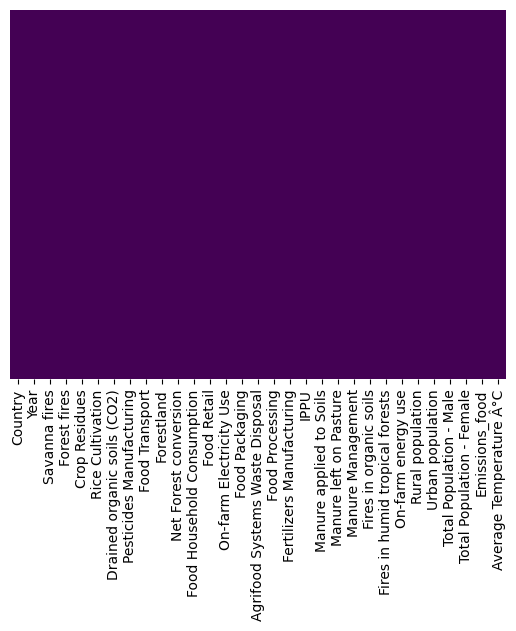

In [32]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
51,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.7740,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.078500
52,Albania,2011,13.9484,2.4710,40.0999,248.061497,109.8112,6.0,275.3115,-961.0391,0.0000,123.7090,75.1379,0.9174,27.6027,617.6381,132.4256,377.407900,1258.9436,207.0069,323.6477,482.0319,0.0,0.0,290.2752,1368297.0,1558362.0,1453895.0,1446759.0,3651.408297,1.070500
53,Albania,2012,20.8187,4.0312,39.9860,248.061497,109.8112,4.0,265.4062,-961.0391,0.0000,125.0822,76.6453,1.0605,29.7415,637.9198,134.3208,377.407900,1327.5173,205.4466,335.0031,487.3965,0.0,0.0,244.5953,1333585.0,1586454.0,1450370.0,1441822.0,3713.212497,1.354583
54,Albania,2013,0.2900,0.0000,40.0653,248.061497,109.1577,5.0,286.2621,-961.0391,0.0000,130.6304,85.9146,1.2721,31.5296,691.7072,141.9204,377.407900,1416.2855,203.7271,343.4951,483.1922,0.0,0.0,266.1464,1302236.0,1616742.0,1448110.0,1438905.0,3901.025997,1.397417
55,Albania,2014,0.1164,0.0000,39.8578,248.061497,109.1577,4.0,308.5878,-961.0391,0.0000,137.5172,93.1405,1.4056,45.3269,690.7405,137.4480,377.407900,1355.3714,207.7000,350.9466,491.2409,0.0,0.0,299.1180,1272790.0,1647985.0,1446732.0,1437370.0,3936.105597,1.290250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.408800,0.0000,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.945800,0.0000,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.139900,0.0000,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.832200,0.0000,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


# 2) Dataset foodEmissions

In [34]:
df_foodEmissions

,ï»¿Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,1.027700e+00,1.242600e+00,8.869000e-01,1.392000e+00,1.274200e+00,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,2.312000e-01,2.796000e-01,1.996000e-01,3.132000e-01,2.867000e-01,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,1.258900e+00,1.522200e+00,1.086500e+00,1.705100e+00,1.560900e+00,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,3.336093e+02,4.033749e+02,2.879099e+02,4.518647e+02,4.136467e+02,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,1.369710e+07,1.379770e+07,1.358338e+07,1.273838e+07,1.311391e+07,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,5.511406e+05,5.902422e+05,6.271651e+05,6.774160e+05,7.641415e+05,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,2.039932e+06,2.035230e+06,2.016547e+06,1.965772e+06,1.931536e+06,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,8.257754e+05,8.312711e+05,7.887649e+05,7.878419e+05,7.864163e+05,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


<Axes: >

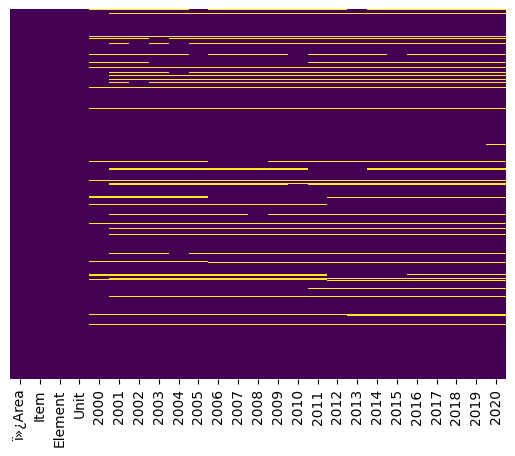

In [35]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
df_foodEmissions = pd.melt(df_foodEmissions, id_vars=['ï»¿Area', 'Item', 'Element', 'Unit'], var_name='Year', value_name='Value')
df_foodEmissions

,ï»¿Area,Item,Element,Unit,Year,Value
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,5.200000e-01
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,2000,1.170000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,2000,6.370000e-01
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2000,1.688070e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2000,1.688070e+02
...,...,...,...,...,...,...
1234060,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,2020,1.088919e+07
1234061,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,2020,9.208261e+05
1234062,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2020,1.825476e+06
1234063,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2020,8.009744e+05


<Axes: >

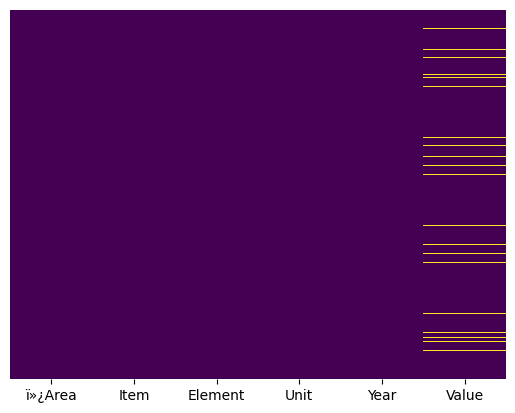

In [37]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"ï»¿Area": "Country", "Value": "Food_emissions"})
df_foodEmissions = df_foodEmissions.sort_values(by="Country")
df_foodEmissions['Year'] = df_foodEmissions['Year'].astype('int64')
df_foodEmissions = df_foodEmissions[df_foodEmissions['Year'] >= 2010]
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
1116734,Afghanistan,LULUCF,Emissions (N2O),kilotonnes,2019,NaN
1116735,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,154.6574
1116736,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,NaN
1116737,Afghanistan,LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2019,0.0000
1116738,Afghanistan,LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2019,0.0000
...,...,...,...,...,...,...
1049446,Zimbabwe,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2017,108.6262
1049444,Zimbabwe,Crop Residues,Emissions (N2O),kilotonnes,2017,0.4099
1049443,Zimbabwe,Crop Residues,Indirect emissions (N2O),kilotonnes,2017,0.0753
1049442,Zimbabwe,Crop Residues,Direct emissions (N2O),kilotonnes,2017,0.3346


In [39]:
df_foodEmissions.nunique()

Country              280
Item                  42
Element                9
Unit                   1
Year                  11
Food_emissions    284591
dtype: int64

In [40]:
df_foodEmissions = df_foodEmissions.dropna(subset=['Food_emissions'])

<Axes: >

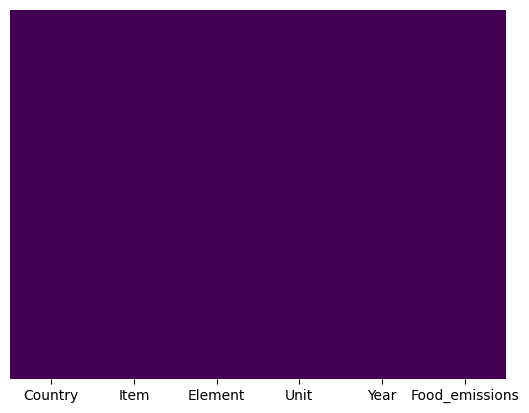

In [41]:
sns.heatmap(df_foodEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 3) Dataset globalFood

In [42]:
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,0.007816,78.155750,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,370000.0,0.042093,42.092618,329000.0,0.037428,37.428300,NaN,NaN,NaN,NaN,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,0.007660,76.596700,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,385000.0,0.042925,42.925370,343000.0,0.038243,38.242600,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,0.007502,75.020776,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,408000.0,0.044554,44.553824,363000.0,0.039640,39.639800,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,0.007878,78.777100,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,431000.0,0.046069,46.069108,383000.0,0.040938,40.938440,NaN,NaN,NaN,NaN,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,0.008332,83.323280,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,448000.0,0.046837,46.836674,399000.0,0.041714,41.713912,NaN,NaN,NaN,NaN,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [43]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,0.003224,32.240532,NaN,NaN,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,0.002530,25.301927,NaN,NaN,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,NaN,NaN,NaN,NaN,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,0.002624,26.238014,NaN,NaN,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,NaN,NaN,NaN,NaN,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,0.002499,24.989840,NaN,NaN,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,NaN,NaN,NaN,NaN,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,0.003055,30.554270,NaN,NaN,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199

<Axes: >

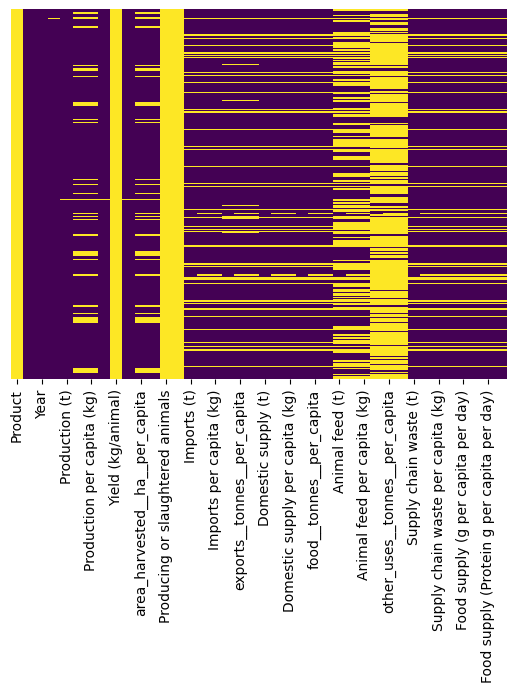

In [44]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
to_drop = ['Product', 'Yield (kg/animal)','Producing or slaughtered animals','Producing or slaughtered animals per capita','Animal feed (t)',
           'feed__tonnes__per_capita', 'Animal feed per capita (kg)', 'Other uses (t)', 'other_uses__tonnes__per_capita', 'Other uses per capita (kg)']
df_globalFood = df_globalFood.drop(to_drop, axis=1)
df_globalFood

,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,74006.0,0.002530,25.301927,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,79938.0,0.002624,26.238014,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,78821.0,0.002499,24.989840,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,99962.0,0.003055,30.554270,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,34648.0,0.002349,23.488416,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,35756.0,0.002375,23.754681,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,35020.0,0.002281,22.807490,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,35580.0,0.002271,22.706296,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


<Axes: >

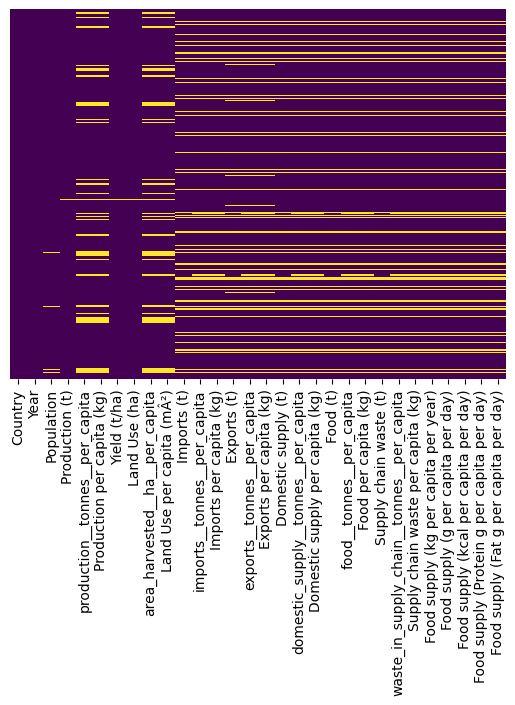

In [46]:
sns.heatmap(df_globalFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 4) Dataset fao

In [47]:
df_fao

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,0118,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27769,894,Zambia,NaN,0118,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27770,894,Zambia,NaN,0118,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27771,894,Zambia,NaN,0118,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


<Axes: >

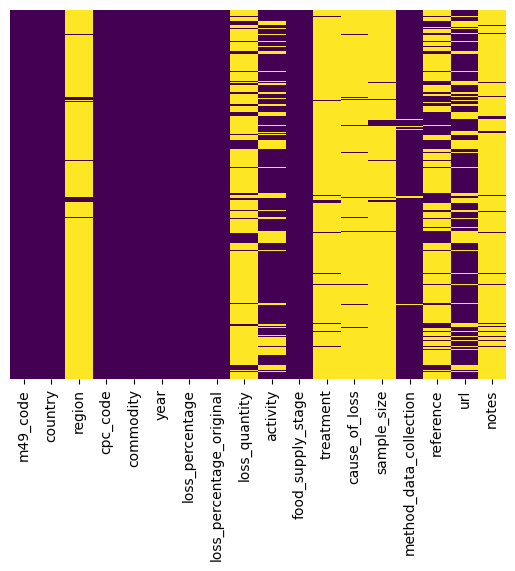

In [48]:
sns.heatmap(df_fao.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
df_fao

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,0118,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27769,894,Zambia,NaN,0118,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27770,894,Zambia,NaN,0118,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27771,894,Zambia,NaN,0118,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [50]:
df_fao

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27768,894,Zambia,NaN,0118,Millet,2000,1.27,1.27,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27769,894,Zambia,NaN,0118,Millet,2000,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27770,894,Zambia,NaN,0118,Millet,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27771,894,Zambia,NaN,0118,Millet,2000,2.38,2.38,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [51]:
df_fao = df_fao.rename(columns={"country": "Country", "year": "Year"})
#df_fao = df_fao.drop(['m49_code', 'region', 'cpc_code', 'url', 'notes'], axis=1)
df_fao = df_fao[df_fao['Year'] >= 2010]
df_fao

,m49_code,Country,region,cpc_code,commodity,Year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
7,108,Burundi,NaN,0111,Wheat,2020,3.50,3.5,NaN,"Shelling, Threshing",Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
8,108,Burundi,NaN,0111,Wheat,2020,4.87,4.87,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
9,108,Burundi,NaN,0111,Wheat,2020,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
10,108,Burundi,NaN,0111,Wheat,2020,4.43,4.43,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
11,108,Burundi,NaN,0112,Maize (corn),2020,4.00,4,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27427,894,Zambia,NaN,0118,Millet,2010,3.45,3.45,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27428,894,Zambia,NaN,0118,Millet,2010,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27429,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27430,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


# Merge com pandas
Aqui vamos fazer o merge dos datasets e verificar o seu tempo

### Pandas merge

In [52]:
start_time = time.time()

df1 = pd.merge(df_agroFood, df_foodEmissions, on=['Country', 'Year'], how='inner')
df2 = pd.merge(df1, df_globalFood, on=['Country', 'Year'], how='inner')
dfinal = pd.merge(df2, df_fao, on=['Country', 'Year'], how='inner')
# dfinal: info entre 2010-2020

elapsed_time = time.time() - start_time

# Exiba o resultado e o tempo decorrido
print(f"Tempo decorrido para o merge: {elapsed_time:.6f} segundos")

Tempo decorrido para o merge: 4.596751 segundos


### PySpark merge

In [53]:
# Crie uma sessão Spark
spark = SparkSession.builder.appName("merge_example").getOrCreate()

# Carregue os DataFrames PySpark
df_agroFood_spark = spark.createDataFrame(df_agroFood)
df_foodEmissions_spark = spark.createDataFrame(df_foodEmissions)
df_globalFood_spark = spark.createDataFrame(df_globalFood)
df_fao_spark = spark.createDataFrame(df_fao)

# Inicie o cronômetro
start_time = time.time()

# Realize os merges usando PySpark
df1_spark = df_agroFood_spark.join(df_foodEmissions_spark, ['Country', 'Year'], 'inner')
df2_spark = df1_spark.join(df_globalFood_spark, ['Country', 'Year'], 'inner')
dfinal_spark = df2_spark.join(df_fao_spark, ['Country', 'Year'], 'inner')

# Pare o cronômetro
elapsed_time_pyspark = time.time() - start_time

#dfinal_spark.show()
print(f"Tempo decorrido para o merge (PySpark): {elapsed_time_pyspark:.6f} segundos")

# Pare a sessão Spark
spark.stop()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/10 16:43:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Tempo decorrido para o merge (PySpark): 0.350919 segundos


In [54]:
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C
51,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.7740,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.078500
52,Albania,2011,13.9484,2.4710,40.0999,248.061497,109.8112,6.0,275.3115,-961.0391,0.0000,123.7090,75.1379,0.9174,27.6027,617.6381,132.4256,377.407900,1258.9436,207.0069,323.6477,482.0319,0.0,0.0,290.2752,1368297.0,1558362.0,1453895.0,1446759.0,3651.408297,1.070500
53,Albania,2012,20.8187,4.0312,39.9860,248.061497,109.8112,4.0,265.4062,-961.0391,0.0000,125.0822,76.6453,1.0605,29.7415,637.9198,134.3208,377.407900,1327.5173,205.4466,335.0031,487.3965,0.0,0.0,244.5953,1333585.0,1586454.0,1450370.0,1441822.0,3713.212497,1.354583
54,Albania,2013,0.2900,0.0000,40.0653,248.061497,109.1577,5.0,286.2621,-961.0391,0.0000,130.6304,85.9146,1.2721,31.5296,691.7072,141.9204,377.407900,1416.2855,203.7271,343.4951,483.1922,0.0,0.0,266.1464,1302236.0,1616742.0,1448110.0,1438905.0,3901.025997,1.397417
55,Albania,2014,0.1164,0.0000,39.8578,248.061497,109.1577,4.0,308.5878,-961.0391,0.0000,137.5172,93.1405,1.4056,45.3269,690.7405,137.4480,377.407900,1355.3714,207.7000,350.9466,491.2409,0.0,0.0,299.1180,1272790.0,1647985.0,1446732.0,1437370.0,3936.105597,1.290250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.408800,0.0000,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.945800,0.0000,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.139900,0.0000,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.832200,0.0000,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [55]:
df_foodEmissions

,Country,Item,Element,Unit,Year,Food_emissions
1116735,Afghanistan,LULUCF,Emissions (CO2),kilotonnes,2019,154.6574
1116737,Afghanistan,LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2019,0.0000
1116738,Afghanistan,LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,2019,0.0000
1116739,Afghanistan,LULUCF,Emissions (CO2eq) (AR5),kilotonnes,2019,154.6574
1116741,Afghanistan,AFOLU,Emissions (CH4),kilotonnes,2019,408.9114
...,...,...,...,...,...,...
1049446,Zimbabwe,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,2017,108.6262
1049444,Zimbabwe,Crop Residues,Emissions (N2O),kilotonnes,2017,0.4099
1049443,Zimbabwe,Crop Residues,Indirect emissions (N2O),kilotonnes,2017,0.0753
1049442,Zimbabwe,Crop Residues,Direct emissions (N2O),kilotonnes,2017,0.3346


In [56]:
df_globalFood

,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,90885.0,0.003224,32.240532,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,74006.0,0.002530,25.301927,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,79938.0,0.002624,26.238014,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,78821.0,0.002499,24.989840,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,99962.0,0.003055,30.554270,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,34648.0,0.002349,23.488416,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,35756.0,0.002375,23.754681,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,35020.0,0.002281,22.807490,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,35580.0,0.002271,22.706296,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [57]:
df_fao

,m49_code,Country,region,cpc_code,commodity,Year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
7,108,Burundi,NaN,0111,Wheat,2020,3.50,3.5,NaN,"Shelling, Threshing",Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
8,108,Burundi,NaN,0111,Wheat,2020,4.87,4.87,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
9,108,Burundi,NaN,0111,Wheat,2020,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
10,108,Burundi,NaN,0111,Wheat,2020,4.43,4.43,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
11,108,Burundi,NaN,0112,Maize (corn),2020,4.00,4,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27427,894,Zambia,NaN,0118,Millet,2010,3.45,3.45,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27428,894,Zambia,NaN,0118,Millet,2010,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27429,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Winnowing,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
27430,894,Zambia,NaN,0118,Millet,2010,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [58]:
df1

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions
0,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (N2O),kilotonnes,0.1140
1,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2),kilotonnes,0.0000
2,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) from CH4 (AR5),kilotonnes,0.0000
3,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) from N2O (AR5),kilotonnes,30.2100
4,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) (AR5),kilotonnes,30.2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369323,Zimbabwe,2020,481.9027,48.4197,108.3022,7.973300,0.000,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.1890,Food Packaging,Emissions (CH4),kilotonnes,0.0032
369324,Zimbabwe,2020,481.9027,48.4197,108.3022,7.973300,0.000,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.1890,Food Packaging,Emissions (N2O),kilotonnes,0.0005
369325,Zimbabwe,2020,481.9027,48.4197,108.3022,7.973300,0.000,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.1890,Food Packaging,Emissions (CO2),kilotonnes,9.7789
369326,Zimbabwe,2020,481.9027,48.4197,108.3022,7.973300,0.000,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.4200,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.1890,On-farm electricity use,Emissions (CO2eq) (AR5),kilotonnes,218.3164


<Axes: >

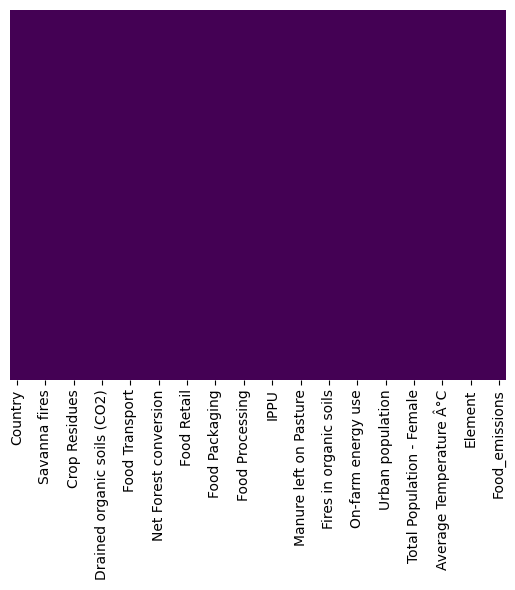

In [59]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
df2

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (N2O),kilotonnes,0.1140,2913402.0,604558.80,0.207510,207.509580,20.566599,29395.0,0.010090,100.895790,21000.0,0.007208,7.208068,34000.0,0.011670,11.670206,856000.0,0.293815,293.814600,709000.0,0.243358,243.35810,85000.0,0.029176,29.175514,243.457240,667.006130,146.721940,6.061134,1.234488
1,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2),kilotonnes,0.0000,2913402.0,604558.80,0.207510,207.509580,20.566599,29395.0,0.010090,100.895790,21000.0,0.007208,7.208068,34000.0,0.011670,11.670206,856000.0,0.293815,293.814600,709000.0,0.243358,243.35810,85000.0,0.029176,29.175514,243.457240,667.006130,146.721940,6.061134,1.234488
2,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) from CH4 (AR5),kilotonnes,0.0000,2913402.0,604558.80,0.207510,207.509580,20.566599,29395.0,0.010090,100.895790,21000.0,0.007208,7.208068,34000.0,0.011670,11.670206,856000.0,0.293815,293.814600,709000.0,0.243358,243.35810,85000.0,0.029176,29.175514,243.457240,667.006130,146.721940,6.061134,1.234488
3,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) from N2O (AR5),kilotonnes,30.2100,2913402.0,604558.80,0.207510,207.509580,20.566599,29395.0,0.010090,100.895790,21000.0,0.007208,7.208068,34000.0,0.011670,11.670206,856000.0,0.293815,293.814600,709000.0,0.243358,243.35810,85000.0,0.029176,29.175514,243.457240,667.006130,146.721940,6.061134,1.234488
4,Albania,2010,2.4143,0.0000,39.5498,248.061497,109.774,7.0,277.1870,-1233.2859,0.0000,137.5797,71.1151,0.2406,27.3674,640.5573,122.7233,377.407900,1103.9133,205.6973,330.4915,482.3426,0.0,0.0,235.4481,1406665.0,1533860.0,1459102.0,1454297.0,3185.584797,1.0785,Other,Emissions (CO2eq) (AR5),kilotonnes,30.2100,2913402.0,604558.80,0.207510,20

In [61]:
dfinal

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Emissions_food,Average Temperature Â°C,Item,Element,Unit,Food_emissions,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),m49_code,region,cpc_code,commodity,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,Angola,2010,26651.2633,17403.4509,138.5767,187.4152,333.4484,1.0,640.3254,0.0000,35168.6650,538.5872,378.3476,661.756338,16.2611,2267.4821,199.595072,356.491017,792.7982,205.5649,2253.9466,460.1939,0.0,17189.8313,28.1266,9398277.0,13970854.0,11510656.0,11853530.0,105873.126827,1.19825,AFOLU,Emissions (CH4),kilotonnes,1033.5812,23364196.0,706667.44,0.030246,30.245742,5.0307,140471.0,0.006012,60.122334,60000.0,0.002568,2.568032,0.0,0.000000,0.000000,767000.0,0.032828,32.828007,689000.0,0.02949,29.489566,78000.0,0.003338,3.338442,29.489650,80.793561,17.993687,1.009646,0.139951,24,NaN,0111,Wheat,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
1,Angola,2010,26651.2633,17403.4509,138.5767,187.4152,333.4484,1.0,640.3254,0.0000,35168.6650,538.5872,378.3476,661.756338,16.2611,2267.4821,199.595072,356.491017,792.7982,205.5649,2253.9466,460.1939,0.0,17189.8313,28.1266,9398277.0,13970854.0,11510656.0,11853530.0,105873.126827,1.19825,AFOLU,Emissions (CH4),kilotonnes,1033.5812,23364196.0,706667.44,0.030246,30.245742,5.0307,140471.0,0.006012,60.122334,60000.0,0.002568,2.568032,0.0,0.000000,0.000000,767000.0,0.032828,32.828007,689000.0,0.02949,29.489566,78000.0,0.003338,3.338442,29.489650,80.793561,17.993687,1.009646,0.139951,24,NaN,0111,Wheat,5.75,5.75,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
2,Angola,2010,26651.2633,17403.4509,138.5767,187.4152,333.4484,1.0,640.3254,0.0000,35168.6650,538.5872,378.3476,661.756338,16.2611,2267.4821,199.595072,356.491017,792.7982,205.5649,2253.9466,460.1939,0.0,17189.8313,28.1266,9398277.0,13970854.0,11510656.0,11853530.0,105873.126827,1.19825,AFOLU,Emissions (CH4),kilotonnes,1033.5812,23364196.0,706667.44,0.030246,30.245742,5.0307,140471.0,0.006012,60.122334,60000.0,0.002568,2.568032,0.0,0.000000,0.000000,767000.0,0.032828,32.828007,689000.0,0.02949,29.489566,78000.0,0.003338,3.338442,29.489650,80.793561,17.993687,1.009646,0.139951,24,NaN,0111,Wheat,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
3,Angola,2010,26651.2633,17403.4509,138.5767,187.4152,333.4484,1.0,640.3254,0.0000,35168.6650,538.5872,378.3476,661.756338,16.2611,2267.4821,199.595072,356.491017,792.7982,205.5649,2253.9466,460.1939,0.0,17189.8313,28.1266,9398277.0,13970854.0,11510656.0,11853530.0,105873.126827,1.

In [62]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207347 entries, 0 to 2207346
Data columns (total 79 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Country                                     object 
 1   Year                                        int64  
 2   Savanna fires                               float64
 3   Forest fires                                float64
 4   Crop Residues                               float64
 5   Rice Cultivation                            float64
 6   Drained organic soils (CO2)                 float64
 7   Pesticides Manufacturing                    float64
 8   Food Transport                              float64
 9   Forestland                                  float64
 10  Net Forest conversion                       float64
 11  Food Household Consumption                  float64
 12  Food Retail                                 float64
 13  On-farm Electricity Use    

In [63]:
dfinal.nunique()

Country                    92
Year                       11
Savanna fires             536
Forest fires              419
Crop Residues             589
                         ... 
sample_size               123
method_data_collection      9
reference                 143
url                        50
notes                     108
Length: 79, dtype: int64

In [64]:
# sns.heatmap(dfinal.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
dfinal.columns

Index(['Country', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'Emissions_food',
       'Average Temperature Â°C', 'Item', 'Element', 'Unit', 'Food_emissions',
       'Population', 'Production (t)', 'production__tonnes__per_capita',
       'Production per capita (kg)', 'Yield (t/ha)', 'Land Use (ha)',
       'area_harvested__ha__per_capita', 'La

In [66]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207347 entries, 0 to 2207346
Data columns (total 79 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Country                                     object 
 1   Year                                        int64  
 2   Savanna fires                               float64
 3   Forest fires                                float64
 4   Crop Residues                               float64
 5   Rice Cultivation                            float64
 6   Drained organic soils (CO2)                 float64
 7   Pesticides Manufacturing                    float64
 8   Food Transport                              float64
 9   Forestland                                  float64
 10  Net Forest conversion                       float64
 11  Food Household Consumption                  float64
 12  Food Retail                                 float64
 13  On-farm Electricity Use    